# Modelado Predictivo para Análisis de Fuga de Clientes (Churn) 

## 📌 Contexto  
El abandono de Clientes (churn) es un factor crítico para las empresas de telecomunicaciones que impacta notablemente a sus beneficios. 
Este proyecto analiza **Telco customer data** para:  
- Identificar patrones que hagan que los clientes se vayan 
- Generar modelos predictivos para detectar clientes en riesgo de abandono
- Recomendar estrategias para retener clientes 

**Preguntas Importantes a Considerar**:  
1. ¿Que factores predicen mejor la fuga de clientes?  
2. ¿Podemos predecir la fuga con suficiente antelación para intervenir?
3. ¿Qué tipo de incentivos serían más efectivos para cada perfil? 

## 🛠️ Parte Técnica  
Implementaré un analisis mediante Machine Learning.  

1. **Analisis Exploratorio de Datos**

- Análisis de distribución de variables clave:
  - Tiempo como cliente (tenure)
  - Patrones de consumo
  - Tipo de contrato
- Detección de valores atípicos y faltantes
             
2. **Modelo Predictivo**
  
- Algoritmos a Comparar:
    - `Regresión Logística`
    - `Random Forest` 
    - `AdaBoost` 
    - `Árbol de Decisión` 
    - `K-Vecinos` (KNN) 

3. **Evaluación del Rendimiento**  
   - Métrica Principal: **Accuracy**     

## 💡 Resultados Esperados  
Implementando el mejor modelo se espera:  
- **Reducir la cantidad de clientes que abandonan**   
- Mejora en **retención** de clientes

*Fuente de datos*: [Kaggle Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)  

## 1 - Importación de librerías

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

## 2 - Carga de datos

In [66]:
# Cargando los datos
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## 3 - Exploración Inicial

In [69]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [71]:
df.shape

(7043, 21)

In [73]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [77]:
# Comprobar si hay valores nulos
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [79]:
# Comprobar si hay duplicados
df.duplicated().sum()

0

In [81]:
# Observación de los datos por si hay alguno erroneo o extraño
for columna in df.columns:
    print(f"Valores únicos y frecuencia en la columna '{columna}':")
    print(df[columna].value_counts())
    print("\n")  

Valores únicos y frecuencia en la columna 'customerID':
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64


Valores únicos y frecuencia en la columna 'gender':
gender
Male      3555
Female    3488
Name: count, dtype: int64


Valores únicos y frecuencia en la columna 'SeniorCitizen':
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


Valores únicos y frecuencia en la columna 'Partner':
Partner
No     3641
Yes    3402
Name: count, dtype: int64


Valores únicos y frecuencia en la columna 'Dependents':
Dependents
No     4933
Yes    2110
Name: count, dtype: int64


Valores únicos y frecuencia en la columna 'tenure':
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64


Valores únicos y frecuencia en la co

## 4 - Visualización de Datos Relevantes

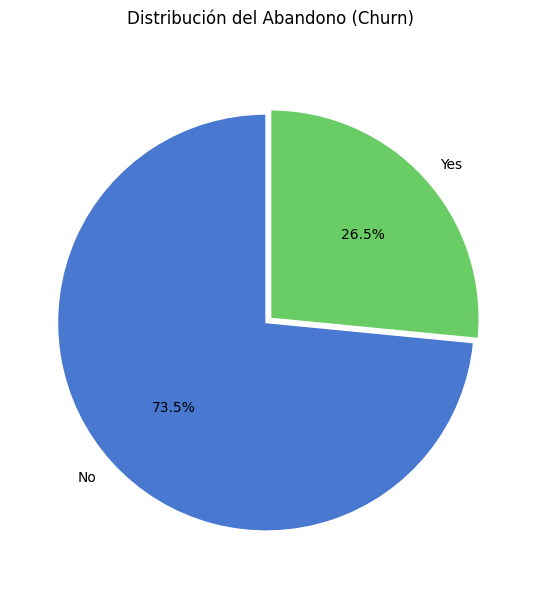

In [84]:
plt.figure(figsize=(6,6))
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', 
                                   startangle=90,
                                   colors=['#4878cf', '#6acc65'],  
                                   explode=[0.03, 0],  
                                   wedgeprops={'linewidth':1, 'edgecolor':'white'})
plt.title('Distribución del Abandono (Churn)\n', fontsize=12, pad=10)
plt.ylabel('')
plt.tight_layout()
plt.show()

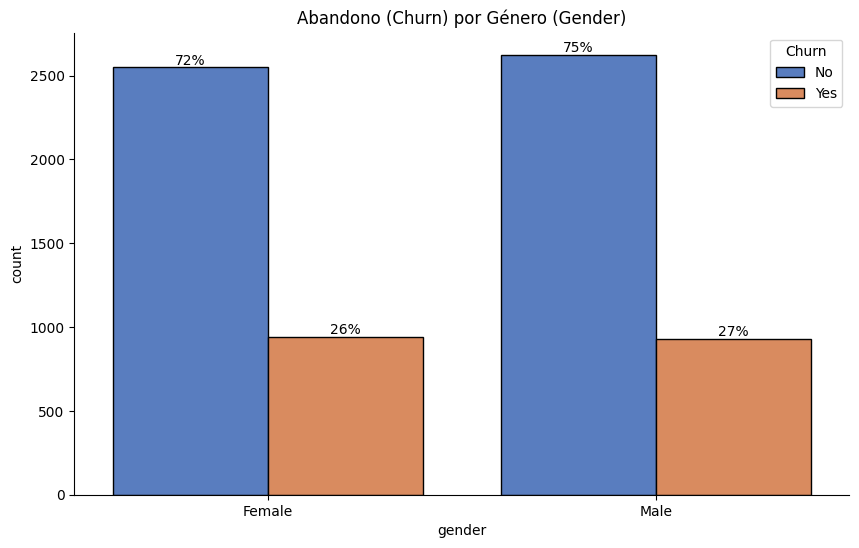

In [86]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="gender", data=df, hue="Churn", palette='muted', edgecolor= "black")

total_counts = df['gender'].value_counts()

for p in ax.patches:
    height = p.get_height()
    if height > 0:  
        gender_idx = int(p.get_x() + 0.5)  
        percentage = f'{100 * height / total_counts.iloc[gender_idx]:.0f}%'
        ax.annotate(percentage, (p.get_x()+p.get_width()/2, height),
                    ha='center', va='bottom', fontsize=10)

plt.title("Abandono (Churn) por Género (Gender)")
sns.despine()
plt.show()

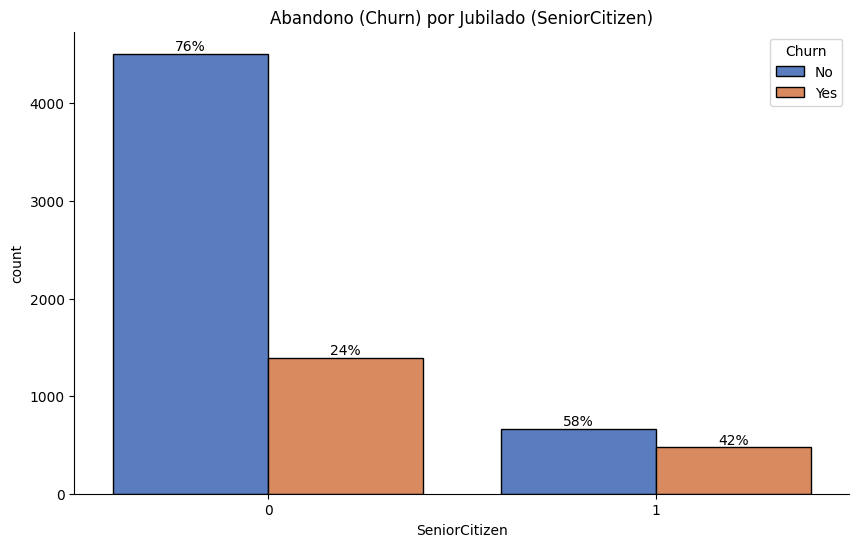

In [88]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="SeniorCitizen", data=df, hue="Churn", palette='muted', edgecolor= "black")

total_counts = df['SeniorCitizen'].value_counts()

for p in ax.patches:
    height = p.get_height()
    if height > 0:  
        senior_idx = int(p.get_x() + 0.5)  
        percentage = f'{100 * height / total_counts.iloc[senior_idx]:.0f}%'
        ax.annotate(percentage, (p.get_x()+p.get_width()/2, height),
                    ha='center', va='bottom', fontsize=10)

plt.title("Abandono (Churn) por Jubilado (SeniorCitizen)")
sns.despine()
plt.show()

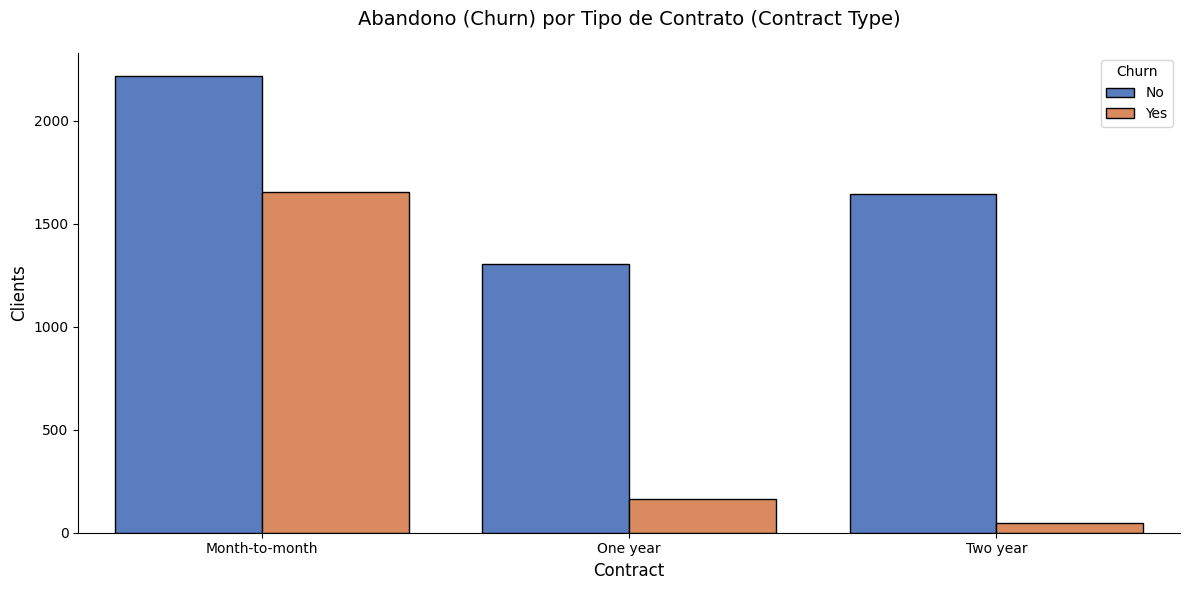

In [90]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="Contract", 
                  data=df, 
                  hue="Churn", 
                  palette='muted', 
                  edgecolor="black")

plt.title("Abandono (Churn) por Tipo de Contrato (Contract Type)", pad=20, fontsize=14)
plt.xlabel("Contract", fontsize=12)
plt.ylabel("Clients", fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

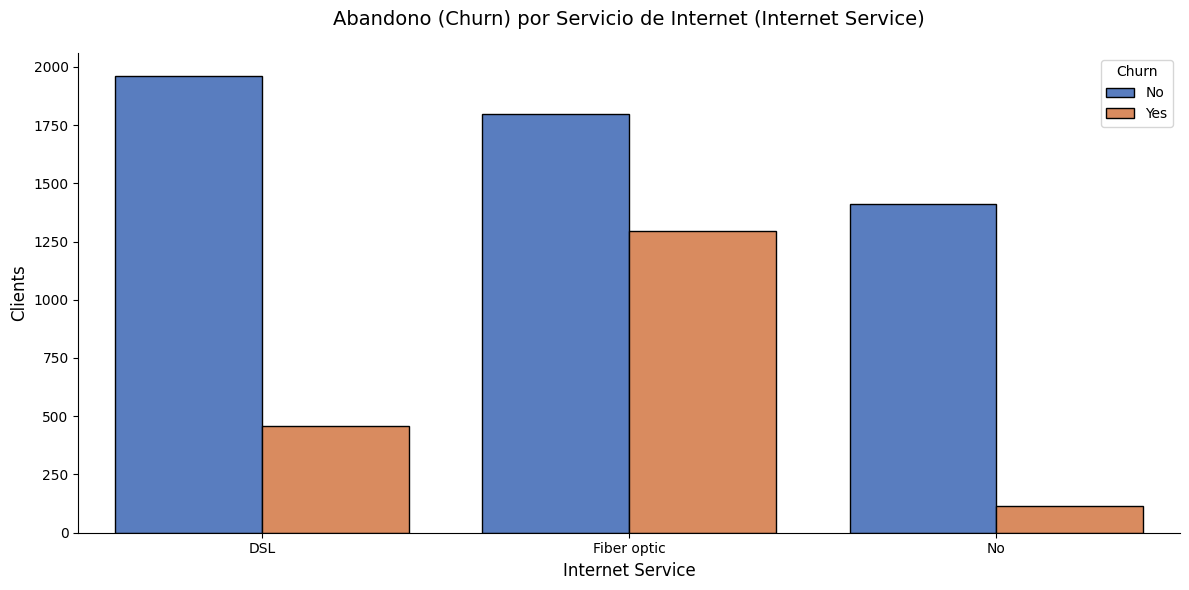

In [92]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="InternetService", 
                  data=df, 
                  hue="Churn", 
                  palette='muted', 
                  edgecolor="black")

plt.title("Abandono (Churn) por Servicio de Internet (Internet Service)", pad=20, fontsize=14)
plt.xlabel("Internet Service", fontsize=12)
plt.ylabel("Clients", fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

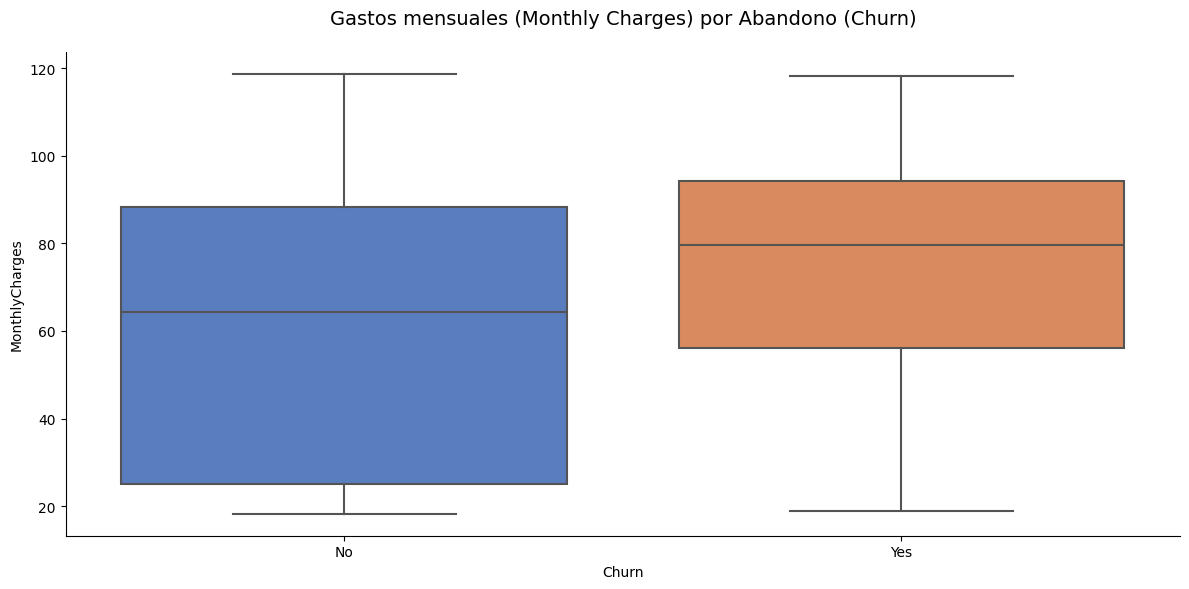

In [94]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, 
            palette='muted')  
plt.title("Gastos mensuales (Monthly Charges) por Abandono (Churn)", pad=20, fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()

## 5 - Codificación de características y división de datos

In [97]:
# 5.1 - Codificación de Variables Categóricas  
le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == "object":
        df[column] = le.fit_transform(df[column])
        print(f"Columna :{column}, Valores Únicos : {df[column].unique()}")

Columna :customerID, Valores Únicos : [5375 3962 2564 ... 3367 5934 2226]
Columna :gender, Valores Únicos : [0 1]
Columna :Partner, Valores Únicos : [1 0]
Columna :Dependents, Valores Únicos : [0 1]
Columna :PhoneService, Valores Únicos : [0 1]
Columna :MultipleLines, Valores Únicos : [1 0 2]
Columna :InternetService, Valores Únicos : [0 1 2]
Columna :OnlineSecurity, Valores Únicos : [0 2 1]
Columna :OnlineBackup, Valores Únicos : [2 0 1]
Columna :DeviceProtection, Valores Únicos : [0 2 1]
Columna :TechSupport, Valores Únicos : [0 2 1]
Columna :StreamingTV, Valores Únicos : [0 2 1]
Columna :StreamingMovies, Valores Únicos : [0 2 1]
Columna :Contract, Valores Únicos : [0 1 2]
Columna :PaperlessBilling, Valores Únicos : [1 0]
Columna :PaymentMethod, Valores Únicos : [2 3 0 1]
Columna :TotalCharges, Valores Únicos : [2505 1466  157 ... 2994 2660 5407]
Columna :Churn, Valores Únicos : [0 1]


In [99]:
# 5.2 - Creación de los sets de Entrenamiento/Test
X = df.drop("Churn", axis=1)
y = df["Churn"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 45)

In [101]:
# 5.3 - Estandarización
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## 6 - Modelos de Machine Learning

### Random Forest

In [105]:
random = RandomForestClassifier()
rf_model = RandomForestClassifier(n_estimators=100, random_state=45)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=45)

In [106]:
y_pred = rf_model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

Random Forest Accuracy: 0.8024


### Decision Tree

In [110]:
dec_tree = DecisionTreeClassifier(
    max_depth=5,             
    min_samples_split=20,      
    random_state=45)

dec_tree.fit(X_train, y_train)

dec_pred = dec_tree.predict(X_test)
print(f"Decision Tree Accuracy: {round(accuracy_score(y_test, dec_pred),4)}")

Decision Tree Accuracy: 0.7967


### Logistic Regression

In [113]:
logreg = LogisticRegression(random_state=45)
logreg.fit(scaled_X_train, y_train)

logreg_pred = logreg.predict(scaled_X_test)
print(f"Logistic Regression Accuracy: {round(accuracy_score(y_test, logreg_pred),4)}")

Logistic Regression Accuracy: 0.8058


### KNN

In [116]:
knn = KNeighborsClassifier(n_neighbors = 30) 
knn.fit(X_train,y_train)

knn_predict = knn.predict(X_test)
print(f"KNN Accuracy : {round(accuracy_score(y_test, knn_predict), 4)}")

KNN Accuracy : 0.7405


### Ada Boost

Ada Boost Accuracy: 0.8149

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1307
           1       0.66      0.57      0.61       454

    accuracy                           0.81      1761
   macro avg       0.76      0.74      0.75      1761
weighted avg       0.81      0.81      0.81      1761



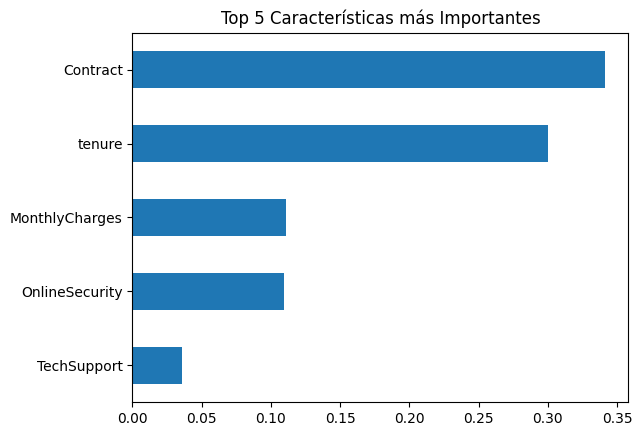

In [119]:
model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=0.5,
     algorithm='SAMME',
    random_state=45
)
model.fit(X_train, y_train)

# Evaluación
y_pred = model.predict(X_test)
print(f"Ada Boost Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Gráfico de características importantes
pd.Series(model.feature_importances_, index=X_train.columns).sort_values().tail(5).plot.barh()
plt.title("Top 5 Características más Importantes")
plt.show()

## 7 - Resultados

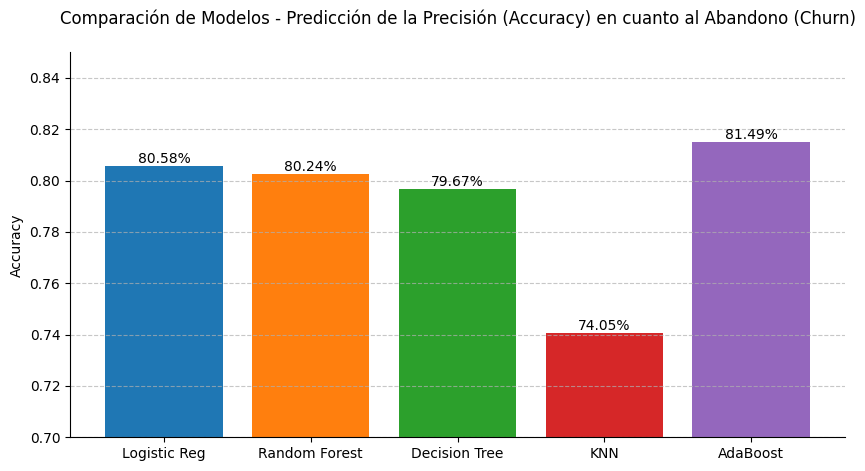

In [121]:
models = ['Logistic Reg', 'Random Forest', 'Decision Tree', 'KNN', 'AdaBoost']
accuracy = [0.8058, 0.8024, 0.7967, 0.7405, 0.8149]

plt.figure(figsize=(10, 5))
bars = plt.bar(models, accuracy, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

#Show %
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2%}', ha='center', va='bottom')

plt.title('Comparación de Modelos - Predicción de la Precisión (Accuracy) en cuanto al Abandono (Churn)', pad=20)
plt.ylim(0.7, 0.85)
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

### Comparación de Rendimiento del Modelo (Conjunto de Datos de Predicción de Churn)

| Algoritmo               | Precisión | Fortalezas                              | Limitaciones                       |
|-------------------------|-----------|----------------------------------------|-----------------------------------|
| **AdaBoost**            | 81.49%    | - Efectivo para capturar patrones no lineales<br>- Reduce el sesgo mediante boosting iterativo | - Requerimientos computacionales más altos<br>- Sensible a datos ruidosos |
| **Regresión Logística** | 80.58%    | - Entrenamiento/predicción rápido<br>- Coeficientes interpretables<br>- Funciona bien con relaciones lineales | - Asume un límite de decisión lineal<br>- Requiere escalado de características |
| **Random Forest**    | 80.24%    | - Maneja bien relaciones no lineales<br>- Robusto ante valores atípicos y faltantes | - Intensivo en memoria con árboles grandes |
| **Decision Tree**   | 79.62%    | - Reglas completamente interpretables<br>- Maneja tipos de datos mixtos | - Sesgo en la importancia de características<br>- Mala generalización |
| **k-NN**                | 74.05%    | - Sin suposiciones sobre la distribución de datos<br>- Simple de implementar | - Sensible al escalado de características<br>- Computacionalmente costoso en tiempo de ejecución |

**Hallazgos Clave:**
- Los modelos AdaBoost y Random Forest alcanzaron >80% de precisión
- Los modelos lineales funcionaron sorprendentemente bien 
- Los Árboles de Decisión proporcionan una explicación clara con una precisión muy alta

**Recomendaciones:**
1. Para producción: **AdaBoost** (mayor precisión)
2. Para prototipado rápido: **Regresión Logística**
